In [1]:
from datetime import datetime

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


# Посмотрим на данные

In [2]:
df = pd.read_csv('UnDone.csv')

In [3]:
df.head()

,id,Название,Класс энергетической эффективности,Ввод в эксплуатацию,Класс недвижимости,Материал стен,Тип отделки,Свободная планировка,Количество этажей,Количество квартир,...,Индекс доступности инфраструктуры,Количество спортивныхплощадок,Наличие понижающихплощадок,Доступность инфраструктуры,Транспортная доступность,Индекс транспортной доступности,Зеленые зоны,Качество воздуха,Индекс зеленой зоны,Индекс качества воздуха
0,50878,"п. Металлплощадка, б-р Строителей, д. 71, корп...",B,IV кв. 2025,Типовой,Кирпич,1 вариант,Есть,4,50,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,41996,"ЖК ""Челны Сити""",Не нормируется,III кв. 2024,Комфорт,Монолит-кирпич,Нет,Нет,8,Нет,...,NaN,1,Есть,9.0,NaN,NaN,NaN,NaN,NaN,NaN
2,45490,DOGMA,B,II кв. 2026,Комфорт,Монолит-кирпич,1 вариант,Нет,17,856,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,50119,"ЖК ""DOLCE VITA""",A,IV кв. 2025,Комфорт,Монолит-кирпич,Нет,Есть,2,Нет,...,NaN,1,Есть,7.0,NaN,NaN,NaN,NaN,NaN,NaN
4,40642,ЖК Городские сады,B,IV кв. 2024,Комфорт,Монолит-кирпич,1 вариант,Нет,20,387,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   id                                             9800 non-null   int64  
 1   Название                                       9800 non-null   object 
 2   Класс энергетической эффективности             9800 non-null   object 
 3   Ввод в эксплуатацию                            9800 non-null   object 
 4   Класс недвижимости                             9800 non-null   object 
 5   Материал стен                                  9800 non-null   object 
 6   Тип отделки                                    9800 non-null   object 
 7   Свободная планировка                           9800 non-null   object 
 8   Количество этажей                              9800 non-null   object 
 9   Количество квартир                             9800 

Какие значения принимают переменные?

In [5]:
for col in df:
  if col == 'Название':
    continue
  #для удобства восприятия мы обрезали до 10 значений
  print(col, df[col].unique()[:10])
  print()

id [50878 41996 45490 50119 40642 46437 48265 56915 47905 49041]

Класс энергетической эффективности ['B' 'Не нормируется' 'A' 'D' 'C' 'A+' 'A++' 'G' 'E']

Ввод в эксплуатацию ['IV кв. 2025' 'III кв. 2024' 'II кв. 2026' 'IV кв. 2024' 'I кв. 2025'
 'II кв. 2024' 'II кв. 2025' 'IV кв. 2026' 'III кв. 2026' 'I кв. 2026']

Класс недвижимости ['Типовой' 'Комфорт' 'Бизнес' 'Элитный' 'Другое']

Материал стен ['Кирпич' 'Монолит-кирпич' 'Другое' 'Монолит' 'Блоки' 'Панель']

Тип отделки ['1 вариант' 'Нет' '2 варианта' '3 варианта']

Свободная планировка ['Есть' 'Нет']

Количество этажей ['4' '8' '17' '2' '20' '18' '1' '10' '16' '5']

Количество квартир ['50' 'Нет' '856' '387' '571' '601' '1' '244' '127' '124']

Жилая площадь, м² ['2 223' 'Нет' '35 071' '23 290' '24 707' '28 993' '67' '13 570' '8 302'
 '4 627']

Высота потолков, м ['2,7' 'Нет' '2,72 - 3,02' '2,7 - 3,32' '2,64 - 2,8' '2,64' '2,65' '2,85'
 '2,7 - 3' '2,74']

Велосипедные дорожки ['Нет' 'Есть' nan]

Количество детских площадок ['1' '

# Поработает с пропусками и отсутствием информации

Посмотрим количесто пропусков по столбцам

In [6]:
df.isna().sum()

id                                                  0
Название                                            0
Класс энергетической эффективности                  0
Ввод в эксплуатацию                                 0
Класс недвижимости                                  0
Материал стен                                       0
Тип отделки                                         0
Свободная планировка                                0
Количество этажей                                   0
Количество квартир                                  0
Жилая площадь, м²                                   0
Высота потолков, м                                  0
Велосипедные дорожки                                1
Количество детских площадок                         1
Количество спортивных площадок                   4771
Количество площадок для сбора мусора                1
Количество мест в паркинге                          1
Гостевые места на придомовой территории             2
Гостевые места вне придомово

Есть несколько показателей для которых при парсинге значения разбились на две колонки с разными названиями, хотя это один и тот же показатель, например, "Доступность инфраструктуры","Индекс доступности инфраструктуры" и другие. Объединим их:

In [7]:
df['Количество спортивных площадок'] = df['Количество спортивных площадок'].fillna(df['Количество спортивныхплощадок'])
df = df.drop('Количество спортивныхплощадок', axis=1)

In [8]:
df['Наличие понижающих площадок'] = df['Наличие понижающих площадок'].fillna(df['Наличие понижающихплощадок'])
df = df.drop('Наличие понижающихплощадок', axis=1)

In [9]:
df['Индекс доступности инфраструктуры'] = df['Индекс доступности инфраструктуры'].fillna(df['Доступность инфраструктуры'])
df = df.drop('Доступность инфраструктуры', axis=1)

In [10]:
df['Индекс транспортной доступности'] = df['Индекс транспортной доступности'].fillna(df['Транспортная доступность'])
df = df.drop('Транспортная доступность', axis=1)

In [11]:
df['Индекс зеленой зоны'] = df['Индекс зеленой зоны'].fillna(df['Зеленые зоны'])
df = df.drop('Зеленые зоны', axis=1)

In [12]:
df['Индекс качества воздуха'] = df['Индекс качества воздуха'].fillna(df['Качество воздуха'])
df = df.drop('Качество воздуха', axis=1)

Посмотрим на количество строчек с разным количеством пропусков

In [13]:
df.isnull().sum(axis=1).value_counts()

3     7798
1      943
2      891
0      165
17       1
10       1
12       1
Name: count, dtype: int64

У нас большая выборка, поэтому удалим строки, где 10 пропусков и больше

In [14]:
df = df.drop(df[df.isnull().sum(axis=1) > 9].index) #таким образом удалим всего 3 строки

В колонке "Количество подъездов" встречается значение "-", его нужно заменить на Nan, так как это отсутствие информации (в остальных колонках такого нет)

In [15]:
df['Количество подъездов'] = df['Количество подъездов'].replace('-', pd.NA)

Для жилой площади мы предполагаем, что "Нет" указывает на ее отсутствие, поэтому ставим 0; аналогично, как и количество подъездов:

In [16]:
df['Жилая площадь, м²'] = df['Жилая площадь, м²'].str.replace(' ', '').replace('Нет', 0).astype(float)

In [17]:
df['Количество подъездов'] = df['Количество подъездов'].replace(pd.NA, 0)

In [18]:
col_bool = ['Велосипедные дорожки', 'Наличие пандуса', 'Наличие понижающих площадок','Свободная планировка']
for col in col_bool:
  df[col] = df[col].map(lambda x: True if x == 'Есть' else False)

In [19]:
col_int = ['Количество этажей', 'Количество квартир', 'Количество детских площадок', 'Количество спортивных площадок',
           'Количество площадок для сбора мусора', 'Количество мест в паркинге', 'Гостевые места на придомовой территории',
           'Гостевые места вне придомовой территории', 'Количество инвалидных подъемников', 'Количество подъездов',
           'Количество пассажирских лифтов', 'Количество грузовыхи грузопассажирских лифтов', 'Индекс доступности инфраструктуры']
for col in col_int:
  df[col] = df[col].replace('Нет', 0).astype(int)

Заменим нули в "Количество этажей" и Количество подъездов на Nan, так как это пропуски

In [20]:
df['Количество этажей'] = df['Количество этажей'].replace(0, pd.NA)
df['Количество подъездов'] = df['Количество подъездов'].replace(0, pd.NA)

Класс энергетической эффективности "Не нормируется" и Класс недвижимости "Другое" встречаются только в недвижимости, где нет жилой площади (это можно будет увидеть дальше в коде), а так как мы рассматриваем только жилую недвижимость, то их мы заменяем на Nan

In [21]:
df['Класс энергетической эффективности'] = df['Класс энергетической эффективности'].replace('Не нормируется', pd.NA)
categories = ['G', 'E', 'D', 'C', 'B', 'A', 'A+', 'A++']
df['Класс энергетической эффективности'] = pd.Categorical(df['Класс энергетической эффективности'], categories=categories, ordered=True)

In [22]:
df['Класс недвижимости'] = df['Класс недвижимости'].replace('Другое', pd.NA)
categories = ['Типовой', 'Комфорт', 'Бизнес', 'Элитный']
df['Класс недвижимости'] = pd.Categorical(df['Класс недвижимости'], categories=categories, ordered=True)

In [23]:
df['Тип отделки'] = df['Тип отделки'].replace('Нет', '0').apply(lambda x: ''.join(filter(str.isdigit, x))).astype(int)

In [24]:
df['Высота потолков, м'] = df['Высота потолков, м'].replace('Нет', '0 - 0')
df.insert(df.columns.get_loc('Высота потолков, м')+1, 'Минимальная высота потолков, м', df['Высота потолков, м'].apply(lambda x: x.split(' ')[0]).apply(lambda x: x.replace(',', '.')).astype(float))

In [25]:
df.insert(df.columns.get_loc('Высота потолков, м')+2, 'Максимальная высота потолков, м', df['Высота потолков, м'].apply(lambda x: x.split(' ')[-1].replace(',', '.') if '-' in x else None))
df['Максимальная высота потолков, м'] = df['Максимальная высота потолков, м'].fillna(df['Минимальная высота потолков, м']).astype(float)


Теперь во всех колонках про потолки заменим нули на Nan, так как это пропуски

In [26]:
df['Максимальная высота потолков, м'] = df['Максимальная высота потолков, м'].replace(0, pd.NA)
df['Минимальная высота потолков, м'] = df['Минимальная высота потолков, м'].replace(0, pd.NA)
df['Высота потолков, м'] = df['Высота потолков, м'].replace('0 - 0', pd.NA)

В целом нам дальше не понадобится столбик с интервальным значением потолков, поэтому его можно удалить.

In [27]:
df = df.drop('Высота потолков, м', axis=1)

In [28]:
df['Ввод в эксплуатацию'] = df['Ввод в эксплуатацию'].apply(lambda x: x.split()[-1] + 'Q' + str(x.split(' ')[0]))
df['Ввод в эксплуатацию'] = df['Ввод в эксплуатацию'].apply(lambda x: x.replace(x.split('Q')[-1], {'I': '1', 'II': '2', 'III': '3', 'IV': '4'}[x.split('Q')[-1]]))

Нам интересно смотреть в целом на количество парковочных мест, но не так важно смотреть в разрезе гоствых/негостевых мест, поэтому сразу объединим колонки: Количество мест в паркинге, Гостевые места на придомовой территории, Гостевые места вне придомовой территории.

In [29]:
df['Количество мест в паркинге'] = df['Количество мест в паркинге'] + df['Гостевые места на придомовой территории'] + df['Гостевые места вне придомовой территории']
df = df.drop(['Гостевые места на придомовой территории', 'Гостевые места вне придомовой территории'], axis=1)

А теперь поработаем с парковками. В данных есть строчки, обозначающие подземные или отдельностоящие паркинги для разных жк. Распределим эти парковочные места пропорционально квартирам по домам этих жк

In [30]:
#создадим вспомогательную таблицу где просуммируем общее количество квартир для каждого жк
df_parking = df[(df['Жилая площадь, м²'] > 0)].groupby('Название').agg({ 'Количество квартир': 'sum' }).reset_index()
#создадим табличку где есть общее количество для жк дополнительных парковочных мест из объектов где жилая площадь равна нулю
places = df[df['Жилая площадь, м²'] == 0].groupby('Название')['Количество мест в паркинге'].sum().reset_index()
#объединим эти две вспомогательные таблички
df_parking = df_parking.merge(places, on='Название', how='left').fillna({'Количество мест в паркинге': 0})
#добавим колонку со средним количеством мест на квартиру
df_parking['Количество мест на квартиру']=df_parking['Количество мест в паркинге']/df_parking['Количество квартир']
#переименуем две колонки, чтобы они отличались от колонок в изначальной таблице
df_parking = df_parking.rename(columns={'Количество мест в паркинге': 'Доп паркинг', 'Количество квартир': 'Количество квартир в жк'})
df_parking

,Название,Количество квартир в жк,Доп паркинг,Количество мест на квартиру
0,"""5 БАЛЛОВ"" Парк ЭКО кварталов",98,0.0,0.000000
1,"""NEO-квартал ""Красная площадь""",585,0.0,0.000000
2,"""URBN""",231,23.0,0.099567
3,"""Zenlife""",227,0.0,0.000000
4,"""АРТ-Квартал""",1350,0.0,0.000000
...,...,...,...,...
4961,"ст-ца Ессентукская, ул Эскадронная, д. 75",322,0.0,0.000000
4962,"ст-ца Тамань, улица Карла Маркса, д. 262 ""А""",199,0.0,0.000000
4963,"тер Автодорога Владикавказ-Алагир (с Гизель), ...",897,0.0,0.000000
4964,тер. СНТ Дружба,40,0.0,0.000000


In [31]:
#добавим вспомогательную таблицу к изначальной
df = df.merge(df_parking, on='Название')
#распределим дополнительные места по объектам
df['Количество мест в паркинге'] = df['Количество мест в паркинге'] + (df['Количество мест на квартиру'] * df['Количество квартир'])
# Удалим ненужные колонки
df = df.drop(['Количество квартир в жк', 'Доп паркинг', 'Количество мест на квартиру'], axis=1)
#Вернемся к нужному типу колонки
df['Количество мест в паркинге'] = df['Количество мест в паркинге'].astype(int)

#Далее рассмотрим жилую недвижимость

Создадим новую табличку, где будет только жилая недвижимость (жилая площадь не 0)

In [32]:
df_resid = df.loc[df['Жилая площадь, м²'] != 0]

In [33]:
df_resid.isna().sum()

id                                                  0
Название                                            0
Класс энергетической эффективности                  0
Ввод в эксплуатацию                                 0
Класс недвижимости                                  0
Материал стен                                       0
Тип отделки                                         0
Свободная планировка                                0
Количество этажей                                   0
Количество квартир                                  0
Жилая площадь, м²                                   0
Минимальная высота потолков, м                     14
Максимальная высота потолков, м                    14
Велосипедные дорожки                                0
Количество детских площадок                         0
Количество спортивных площадок                      0
Количество площадок для сбора мусора                0
Количество мест в паркинге                          0
Наличие пандуса             

У нас есть одно наблюдение для жилых домов, где количество подъездов 0. Мы посмотрели на фотографии этого дома https://наш.дом.рф/сервисы/каталог-новостроек/объект/23862 и пришли к выводу, что там один подъезд, поэтому доплним эту информацию

In [34]:
df_resid.at[7682, 'Количество подъездов'] = 1

Для жилой недвижимости пропуски только в 14 строках в колонках, связанных с высотой потолка. Заменим эти значения на медиану.

In [35]:
df['Минимальная высота потолков, м'].fillna(df['Минимальная высота потолков, м'].median(), inplace=True)
df['Максимальная высота потолков, м'].fillna(df['Максимальная высота потолков, м'].median(), inplace=True)

Посмотрим какие классы ЭЭ и недвижимости встречаются среди жилых домов.

In [36]:
df_resid['Класс энергетической эффективности'].value_counts()

Класс энергетической эффективности
B      4146
A      1545
C      1535
A+      718
A++     450
D       216
E         5
G         1
Name: count, dtype: int64

In [37]:
df_resid['Класс недвижимости'].value_counts()

Класс недвижимости
Комфорт    5038
Типовой    2581
Бизнес      785
Элитный     212
Name: count, dtype: int64

Так как тут нет категорий "Другое" и "Не нормируется", то в первоначальной табличке мы их убрали, так как рассматриваем только жилую недвижимость. (этот момент уточнялся в коде выше)

#Добавляем производные признаки

1. Первый производный признак - средняя площадь квартиры

In [38]:
df_resid.insert(df_resid.columns.get_loc('Жилая площадь, м²')+1, 'Средняя площадь квартиры, м²', df_resid['Жилая площадь, м²'] / df_resid['Количество квартир'])
df_resid['Средняя площадь квартиры, м²'].fillna(0, inplace=True)

<ipython-input-38-2f3800db2826>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_resid['Средняя площадь квартиры, м²'].fillna(0, inplace=True)


2. Второй производный признак - общее количество спортивных и детских площадок

In [39]:
df_resid.insert(df_resid.columns.get_loc('Количество спортивных площадок')+1, 'Сумма детских и спортивных площадок', df_resid['Количество спортивных площадок'] + df_resid['Количество детских площадок'])

3. Третий производный признак звязан с количеством лифтов. Для начала посмотрим суммарное количество пассажирских и грузовых лифтов, а дальше рассмотрим "лифтовооруженность" ЖК

In [40]:
df_resid.insert(df_resid.columns.get_loc('Количество грузовыхи грузопассажирских лифтов')+1, 'Количество грузовых и пассажирских лифтов', df_resid['Количество грузовыхи грузопассажирских лифтов'] + df_resid['Количество пассажирских лифтов'])
#В названии колонки ошибочка, исправим
df_resid = df_resid.rename(columns={'Количество грузовыхи грузопассажирских лифтов': 'Количество грузовых и грузопассажирских лифтов'})

Необходимо посчитать, на сколько квартир приходится 1 лифт в объекте недвижимости. Посколько жители 1 этажа лифтом не пользуются, квартиры, расположенные на нем, вычитаем. Делаем допущение, что лифтом также не пользуются 75% жителей 2 этажа, 50% - 3 этажа, 25% - 4 этажа и 20% людей, проживающих на 5 этаже. Посколько по законам РФ лифты должны быть обязательно построены в домах с 6 этажами и выше, предполагаем, что жители 6 и последующих этажей в 100% случаев лифтом пользуются.

In [41]:
def coef(n_floors):
    result = np.where(n_floors == 1, 1,
                      np.where(n_floors == 2, 1.75,
                               np.where(n_floors == 3, 2.25,
                                        np.where(n_floors == 4, 2.5, 2.7))))
    return result

In [42]:
df_resid.insert(df_resid.columns.get_loc('Количество грузовых и пассажирских лифтов') + 1, 'Лифтовооруженность', np.where((df_resid['Количество грузовых и пассажирских лифтов'] == 0) | (df_resid['Количество этажей'] == 0), 0,
          (df_resid['Количество квартир'] - coef(df_resid['Количество этажей'])* (df_resid['Количество квартир'] / df_resid['Количество этажей'])) / np.where(df_resid['Количество грузовых и пассажирских лифтов'] != 0, df_resid['Количество грузовых и пассажирских лифтов'], 1)))

4. Четвертый производный признак - среда для маломобильных граждан

Посмотрим на распределение количеста инвалидных подъемников. Мы видим, что они практически везде отсутствуют, поэтому днный признак мы не будем рассматривать, как элемент расчета показателя наличия среды для маломобильных граждан

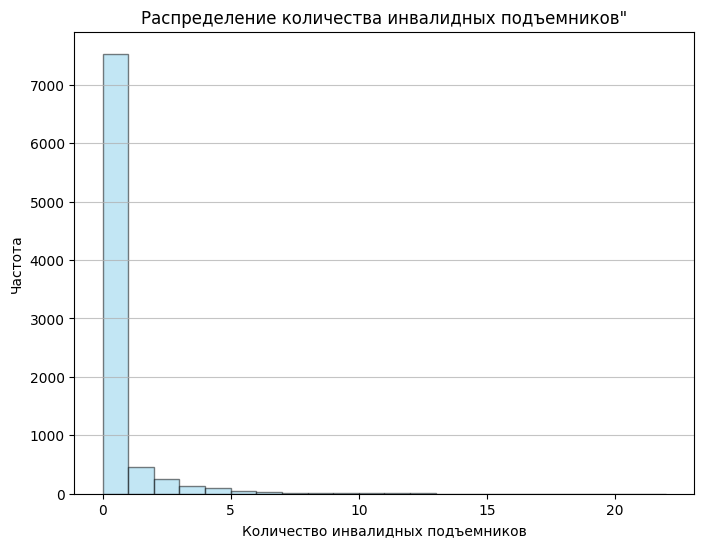

In [43]:
plt.figure(figsize=(8, 6))
plt.hist(df_resid['Количество инвалидных подъемников'], bins=range(max(df_resid['Количество инвалидных подъемников']) + 2), color='skyblue', edgecolor='black', alpha=0.5)
plt.xlabel('Количество инвалидных подъемников')
plt.ylabel('Частота')
plt.title('Распределение количества инвалидных подъемников"')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [44]:
df_resid.insert(df_resid.columns.get_loc('Количество инвалидных подъемников')+1, 'Среда для маломобильных граждан', 0.5*(df_resid['Наличие пандуса'] + df_resid['Наличие понижающих площадок']))

4. Пятый производный признак - оснащенность парковками: сколько парковочных мест приходится на одну квартиру

In [45]:
df_resid['Количество парковочных мест на квартиру'] = df['Количество мест в паркинге'] / df['Количество квартир']

##Сохраним все что нам нужно в табличку

In [46]:
variables = ['id', 'name', 'energy_efficiency', 'due_date', 'class', 'wall_material', 'n_finish_types', 'layout_variation', 'n_floors', 'n_flats', 'life_space', 'av_flat',
             'min_ceiling_height', 'max_ceiling_height', 'bike_paths', 'n_playgrounds', 'n_sportsgrounds', 'n_p_s_grounds', 'n_garbage_sites',
             'n_parking_places', 'ramp', 'lowering_platforms', 'n_wheelchair_lifts', 'low_mobility_facilities', 'n_entrances', 'n_p_lifts',
             'n_f_lifts', 'n_lifts', 'lift_ratio','infrastr_access', 'transport_access', 'green_areas', 'air_quality', 'n_parking_per_flat']

In [47]:
df_resid = df_resid.rename(columns=dict(zip(df_resid.columns, variables)))

In [48]:
df_resid.to_csv('Residential.csv', index=False)